In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv("fraudTest.csv")

In [5]:
print(df_train.shape)
print(df_test.shape)

(116621, 23)
(116581, 23)


In [6]:
df = pd.concat([df_train, df_test])

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


<Axes: xlabel='is_fraud'>

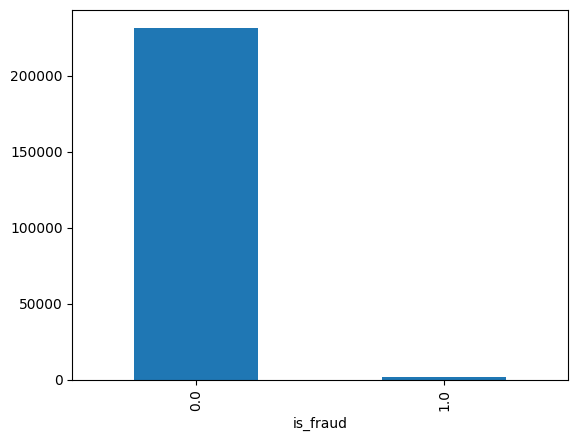

In [8]:
df.groupby("is_fraud").count()["cc_num"].plot(kind = "bar")

As we can see from the plot the number of not_fraud is way larger than fraud which will decrease the performance of the model as there will be high chance to choose not_Fraud over fraud so we will resample it

In [9]:
fraud = df[df["is_fraud"] == 1]
not_fraud =  df[df["is_fraud"] == 0]
print(fraud.shape)
print(not_fraud.shape)

(1557, 23)
(231643, 23)


In [10]:
not_fraud = not_fraud.sample(fraud.shape[0], random_state = 42)
df_new = pd.concat([fraud, not_fraud])

<Axes: xlabel='is_fraud'>

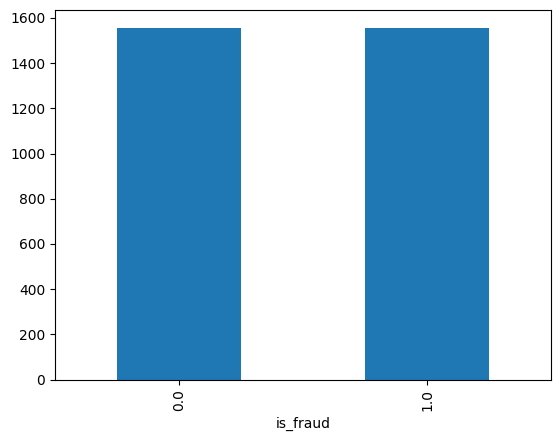

In [11]:
df_new.groupby("is_fraud").count()['cc_num'].plot(kind = "bar")

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3114 entries, 2449 to 52099
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3114 non-null   int64  
 1   trans_date_trans_time  3114 non-null   object 
 2   cc_num                 3114 non-null   int64  
 3   merchant               3114 non-null   object 
 4   category               3114 non-null   object 
 5   amt                    3114 non-null   float64
 6   first                  3114 non-null   object 
 7   last                   3114 non-null   object 
 8   gender                 3114 non-null   object 
 9   street                 3114 non-null   object 
 10  city                   3114 non-null   object 
 11  state                  3114 non-null   object 
 12  zip                    3114 non-null   int64  
 13  lat                    3114 non-null   float64
 14  long                   3114 non-null   float64
 15  city_

In [13]:
useless_cols = [
    'Unnamed: 0',
    'merchant',
    'cc_num',
    'first',
    'zip',
    'last',
    'trans_num',
    'unix_time',
    'street',
    'merch_lat',
    'gender',
    'merch_long',
    'job',
    'trans_date_trans_time'
]


In [14]:
df_new.drop(columns=useless_cols, inplace=True)

In [15]:
df_new.isna().sum()

category    0
amt         0
city        0
state       0
lat         0
long        0
city_pop    0
dob         0
is_fraud    0
dtype: int64

In [16]:
df_new.duplicated().sum()

0

In [17]:
df_new.drop_duplicates()

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1.0
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1.0
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1.0
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1.0
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1.0
...,...,...,...,...,...,...,...,...,...
38797,health_fitness,5.99,Walnut Ridge,AR,36.0244,-90.9288,7155,1977-03-23,0.0
109945,health_fitness,11.99,Whaleyville,MD,38.4121,-75.2811,718,1985-03-19,0.0
67353,home,61.36,Cecilton,MD,39.4015,-75.8654,663,1969-01-14,0.0
66751,home,39.29,Clifton,SC,34.9906,-81.8327,167,1988-11-01,0.0


In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3114 entries, 2449 to 52099
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  3114 non-null   object 
 1   amt       3114 non-null   float64
 2   city      3114 non-null   object 
 3   state     3114 non-null   object 
 4   lat       3114 non-null   float64
 5   long      3114 non-null   float64
 6   city_pop  3114 non-null   int64  
 7   dob       3114 non-null   object 
 8   is_fraud  3114 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 307.8+ KB


#Feature Engineering

we will create new features that can help improve the performance of our models

In [19]:
df_new["dob"] = pd.to_datetime(df_new["dob"])

In [20]:
from datetime import datetime
df_new["dob"] = df_new["dob"].dt.year
df_new['dob'] = datetime.now().year - df_new['dob']
df_new = df_new.rename(columns = {"dob" : "age"})

In [21]:
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,36,1.0
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,64,1.0
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,64,1.0
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,36,1.0
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,64,1.0
...,...,...,...,...,...,...,...,...,...
38797,health_fitness,5.99,Walnut Ridge,AR,36.0244,-90.9288,7155,47,0.0
109945,health_fitness,11.99,Whaleyville,MD,38.4121,-75.2811,718,39,0.0
67353,home,61.36,Cecilton,MD,39.4015,-75.8654,663,55,0.0
66751,home,39.29,Clifton,SC,34.9906,-81.8327,167,36,0.0


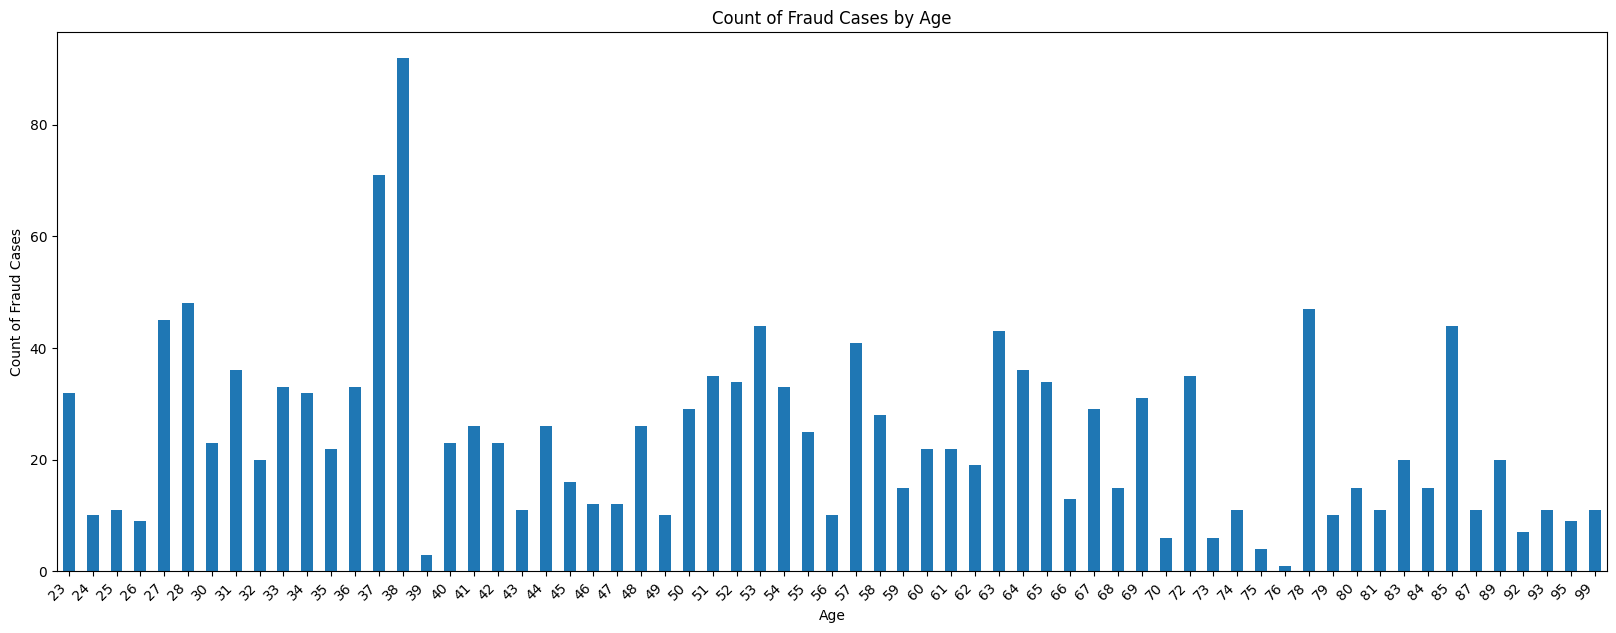

In [22]:
plt.figure(figsize=(20, 7))
ax = df_new[df_new['is_fraud'] == 1].groupby('age').count()['is_fraud'].plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Age')
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
numeric_columns = [i for i in df_new.columns if df_new[i].dtype == 'int64' or df_new[i].dtype =='int32' or df_new[i].dtype =='float64']
categorical_columns = [i for i in df_new.columns if df_new[i].dtype == 'object']

In [24]:
print(numeric_columns)
print(categorical_columns)

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'city', 'state']


In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
enc = LabelEncoder()
for col in categorical_columns:
    df_new[col] = enc.fit_transform(df_new[col])
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,4,281.06,125,26,35.9946,-81.7266,885,36,1.0
2472,2,11.52,556,41,29.4400,-98.4590,1595797,64,1.0
2523,4,276.31,556,41,29.4400,-98.4590,1595797,64,1.0
2546,2,7.03,125,26,35.9946,-81.7266,885,36,1.0
2553,4,275.73,556,41,29.4400,-98.4590,1595797,64,1.0
...,...,...,...,...,...,...,...,...,...
38797,5,5.99,644,2,36.0244,-90.9288,7155,47,0.0
109945,5,11.99,673,19,38.4121,-75.2811,718,39,0.0
67353,6,61.36,98,19,39.4015,-75.8654,663,55,0.0
66751,6,39.29,117,38,34.9906,-81.8327,167,36,0.0


In [26]:
columns = df_new.columns.tolist()
columns.remove('is_fraud')
X = df_new.drop(['is_fraud'], axis=1)
y = df_new['is_fraud']

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X

In [27]:
df_new

,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,-0.690837,-0.021691,-1.137747,0.016623,-0.517710,0.563442,-0.313682,-0.853137,1.0
2472,-1.205124,-0.729234,1.051877,1.129061,-1.725824,-0.584128,4.740191,0.657591,1.0
2523,-0.690837,-0.034160,1.051877,1.129061,-1.725824,-0.584128,4.740191,0.657591,1.0
2546,-1.205124,-0.741021,-1.137747,0.016623,-0.517710,0.563442,-0.313682,-0.853137,1.0
2553,-0.690837,-0.035682,1.051877,1.129061,-1.725824,-0.584128,4.740191,0.657591,1.0
...,...,...,...,...,...,...,...,...,...
38797,-0.433693,-0.743751,1.498946,-1.763277,-0.512217,-0.067679,-0.293814,-0.259637,0.0
109945,-0.433693,-0.728001,1.646276,-0.502514,-0.072127,1.005499,-0.314211,-0.691273,0.0
67353,-0.176549,-0.598404,-1.274916,-0.502514,0.110235,0.965425,-0.314386,0.172000,0.0
66751,-0.176549,-0.656338,-1.178389,0.906574,-0.702762,0.556166,-0.315957,-0.853137,0.0


Building the Models

We will build several machine learning models to detect fraudulent transactions. This includes logistic regression, decision trees, random forests, gradient boosting, XGBoost, SVC, KNeighborsClassifier, and GaussianNB.

Models to Build:

Logistic Regression

Decision Tree

Random Forest

Gradient Boosting Machine (GBM)

XGBoost

Support Vector Classifier (SVC)

K-Nearest Neighbors (KNeighborsClassifier)

Gaussian Naive Bayes (GaussianNB)

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

# Function to evaluate models

In [32]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [35]:
# Evaluate each model
results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy*100,
        'Precision': precision*100,
        'Recall': recall*100,
        'F1 Score': f1*100
    }

# Create a DataFrame to display the results

In [36]:
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,84.109149,93.893130,74.772036,83.248731
Decision Tree,94.060995,96.496815,92.097264,94.245723
Random Forest,95.184591,97.460317,93.313070,95.341615
Gradient Boosting,92.776886,93.292683,93.009119,93.150685
XGBoost,95.505618,96.024465,95.440729,95.731707
SVC,85.553772,95.785441,75.987842,84.745763
KNN,80.256822,82.187500,79.939210,81.047766
Naive Bayes,73.675762,93.650794,53.799392,68.339768
AdaBoost,88.603531,90.062112,88.145897,89.093702


 Initialize the XGBoost model as it has highest accuracy

In [37]:
xgbm = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Train the model on the training data
xgbm.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Evaluating the Models

We will evaluate the performance of our models using various metrics such as accuracy, precision, recall, and the F1 score. We will also plot the ROC curves and calculate the AUC.

Evaluation Metrics:

Accuracy

Precision

Recall

F1 Score

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
# Print confusion matrix and classification report
y_pred = xgbm.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[281  13]
 [ 15 314]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       294
         1.0       0.96      0.95      0.96       329

    accuracy                           0.96       623
   macro avg       0.95      0.96      0.95       623
weighted avg       0.96      0.96      0.96       623



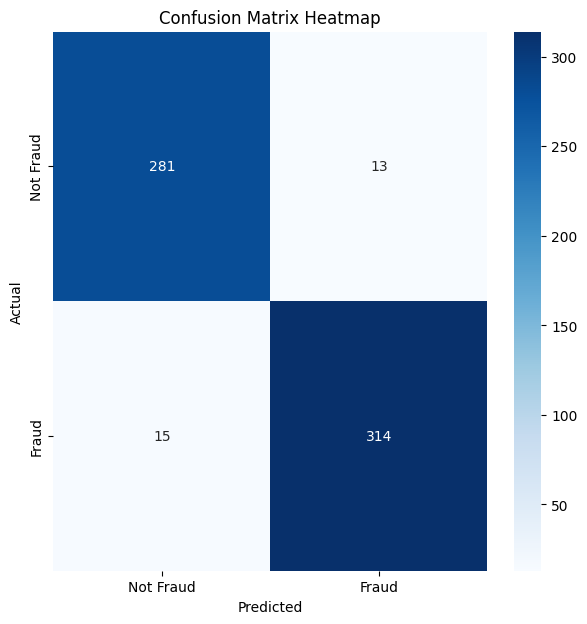

In [41]:
plt.figure(figsize=(7,7))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap = 'Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()